## Esercitazione 6 - 25 Marzo 2024

Scrivere le funzioni python `bisezione.py`, `falsi.py`,  che implementino rispettivamente il metodo di bisezione, di falsa posizione, delle corde, delle secanti e di Newton.

Le funzioni `bisezione.py`, `falsi.py` devono assumere come input:

-  gli estremi dell'intervallo [a,b], dominio di f.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il testi di arresto per l'errore relativo tra due iterati successivi
-  tolf: tolleranza per il test di arresto sul valore della funzione
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk



**Sperimentazione numerica**

## Esercizio 1 

 Confrontare i metodi sopra implementati nei casi seguenti:
- f(x) = $x^3-6x^2-4x+24$ in [-3,8], tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=-2,2,6);
- f(x) = exp(−x) − (x + 1) in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3]  tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei casi 2-4.


In [28]:
import math
import numpy as np
import matplotlib.pyplot as plt
def sign(x):
    return math.copysign(1,x)

In [69]:
def metodo_bisezione(fname,a,b,tolx):
    fa=fname(a)
    fb=fname(b)
    if sign(fa*fb) >= 0:
        print("Metodo di bisezione non applicabile")
        return None,None,None

    it=0
    v_vk=[]
    while abs(fxk)>tolf:
        xk = a+(b-a)/2
        v_vk.append(xk)
        it+=1
        fxk=fname(xk)
        if fxk==0:
            return xk,it,v_vk

        if sign(fa*fxk)<0: #radice si trova nell'intervallo [a,xk]
            b=xk
            fb=fxk
        elif sign(fxk*fb)<0: #radice si trova nell'intervallo [xk,b]
            a=xk
            fa=fxk
    return xk,it,v_vk

In [71]:
def falsa_posizione(fname,a,b,tolx):
    fa=fname(a)
    fb=fname(b)
    if sign(fa*fb) >= 0:
        print("Metodo di bisezione non applicabile")
        return None,None,None

    it=0
    v_vk=[]
    errore=100
    xprec=a
    while it<maxit and abs(fxk)>tolf and errore>tolx:
        xk = a+(b-a)/2
        v_vk.append(xk)
        it+=1
        fxk=fname(xk)
        if fxk==0:
            return xk,it,v_vk

        if sign(fa*fxk)<0: #radice si trova nell'intervallo [a,xk]
            b=xk
            fb=fxk
        elif sign(fxk*fb)<0: #radice si trova nell'intervallo [xk,b]
            a=xk
            fa=fxk
        if xk != 0:
            errore = abs(xk-xprec)/abs(xk)
        else:
            errore = abs(xk-xprec)
    return xk,it,v_vk

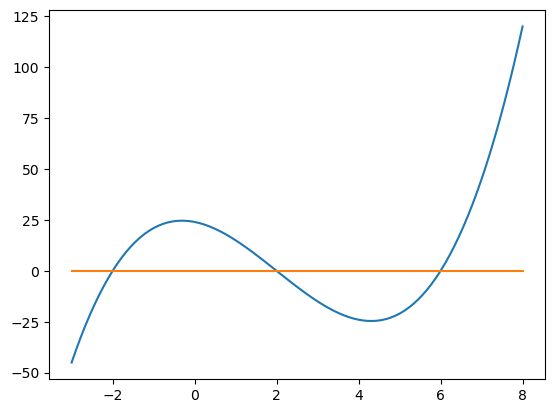

In [73]:
a = -3.0
b = 8.0
f = lambda x: x**3 -6*x**2 -4*x +24
x = np.linspace(a,b,100)
plt.plot(x,f(x),x,np.zeros_like(x))

In [75]:
a1 = -3.0
b1 = 0.0
tolx = 1.0e-12
xk,it,v_xk = metodo_bisezione(f,a1,b1,tolx)
print("zero ", xk, "\niterazioni= ",it)
alpha=-2.0
ek=np.abs(np.array(v_xk)-alpha)
tolf=1e-12
maxit=500
xk_falsi,it_falsi,v_xk_falsi = falsa_posizione(f,a1,b1,tolx,tolf,maxit)
ek_falsi = np.abs(np.array(v_xk_falsi)-alpha)
print("zero falsi ", xk_falsi, "iterazioni= ", it_falsi)
plt.semilogy(np.arange(it),ek,'ro', np.arange(it_falsi), ek_falsi, 'sb')

UnboundLocalError: cannot access local variable 'fxk' where it is not associated with a value

## Esercizio 2

- Utilizzare il metodo di bisezione per calcolare la radice quadrata di 2. Analizzate i risultati.

## Esercizio 3
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

In [81]:
def mynorma1(B):
    c = np.sum(np.abs(B),axis=0)
    n1 = np.max(c)
    return n1

In [87]:
A = np.array([[2,-3,5],[-6,3,-4],[7,8,9]])
print(A)
n1= mynorma1(A)
print("norma 1: ",n1)

[[ 2 -3  5]
 [-6  3 -4]
 [ 7  8  9]]
norma 1:  18


## Esercizio 4
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg